In [1]:
#pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import displot
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import numpy as np
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
import base64
import requests as rq
import json
from datetime import date


# Arbol de Decision
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Matriz de Confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Regresion Logistica
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('idealista_zaragoza_2024-09-06.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1537 non-null   int64  
 1   thumbnail               1527 non-null   object 
 2   externalReference       1048 non-null   object 
 3   numPhotos               1537 non-null   int64  
 4   floor                   1452 non-null   object 
 5   price                   1537 non-null   float64
 6   priceInfo               1537 non-null   object 
 7   propertyType            1537 non-null   object 
 8   operation               1537 non-null   object 
 9   size                    1537 non-null   float64
 10  exterior                1426 non-null   object 
 11  rooms                   1537 non-null   int64  
 12  bathrooms               1537 non-null   int64  
 13  address                 1537 non-null   object 
 14  province                1537 non-null   

In [4]:
df.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,newDevelopmentFinished
0,105157805,https://img4.idealista.com/blur/WEB_LISTING/0/...,CATOLICO 250,67,7,250000.0,"{'price': {'amount': 250000.0, 'currencySuffix...",flat,sale,113.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,105832061,https://img4.idealista.com/blur/WEB_LISTING/0/...,CLA195,35,3,195000.0,"{'price': {'amount': 195000.0, 'currencySuffix...",flat,sale,65.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN
2,105447275,https://img4.idealista.com/blur/WEB_LISTING/0/...,NaN,50,en,220000.0,"{'price': {'amount': 220000.0, 'currencySuffix...",flat,sale,148.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,104623253,https://img4.idealista.com/blur/WEB_LISTING/0/...,NaN,46,2,236000.0,"{'price': {'amount': 236000.0, 'currencySuffix...",flat,sale,156.0,...,"{'subtitle': 'Ruiseñores, Zaragoza', 'title': ...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,105341044,https://img4.idealista.com/blur/WEB_LISTING/0/...,LALUZ160,31,bj,160000.0,"{'price': {'amount': 160000.0, 'currencySuffix...",flat,sale,66.0,...,"{'subtitle': 'Ruiseñores, Zaragoza', 'title': ...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN


In [5]:
# Crear un diccionario para mapear los nombres actuales a los nombres en español (sin acentos)
column_mapping = {
    'propertyCode': 'CodigoPropiedad',
    'thumbnail': 'MiniaturaURL',
    'numPhotos': 'NumeroFotos',
    'floor': 'Piso',
    'price': 'Precio',
    'priceInfo': 'InformacionPrecio',
    'propertyType': 'TipoPropiedad',
    'operation': 'Operacion',
    'size': 'Tamano',
    'exterior': 'Exterior',
    'rooms': 'Habitaciones',
    'bathrooms': 'Banos',
    'address': 'Direccion',
    'province': 'Provincia',
    'municipality': 'Municipio',
    'district': 'Distrito',
    'country': 'Pais',
    'neighborhood': 'Barrio',
    'latitude': 'Latitud',
    'longitude': 'Longitud',
    'showAddress': 'MostrarDireccion',
    'url': 'URL',
    'distance': 'Distancia',
    'description': 'Descripcion',
    'hasVideo': 'TieneVideo',
    'status': 'Estado',
    'newDevelopment': 'NuevaConstruccion',
    'hasLift': 'TieneAscensor',
    'priceByArea': 'PrecioPorMetroCuadrado',
    'detailedType': 'TipoDetallado',
    'suggestedTexts': 'TextosSugeridos',
    'hasPlan': 'TienePlano',
    'has3DTour': 'TieneTour3D',
    'has360': 'Tiene360',
    'hasStaging': 'TieneHomeStaging',
    'topNewDevelopment': 'DestacadoNuevoDesarrollo',
    'topPlus': 'DestacadoPremium',
    'externalReference': 'ReferenciaExterna',
    'parkingSpace': 'EspacioEstacionamiento',
    'highlight': 'Destacado'
}

# Cambiar los nombres de las columnas en el DataFrame
df.rename(columns=column_mapping, inplace=True)

# Verificar los nuevos nombres de las columnas
print("Columnas en df después del renombramiento:")
print(df.columns)

Columnas en df después del renombramiento:
Index(['CodigoPropiedad', 'MiniaturaURL', 'ReferenciaExterna', 'NumeroFotos',
       'Piso', 'Precio', 'InformacionPrecio', 'TipoPropiedad', 'Operacion',
       'Tamano', 'Exterior', 'Habitaciones', 'Banos', 'Direccion', 'Provincia',
       'Municipio', 'Distrito', 'Pais', 'Barrio', 'Latitud', 'Longitud',
       'MostrarDireccion', 'URL', 'Distancia', 'Descripcion', 'TieneVideo',
       'Estado', 'NuevaConstruccion', 'TieneAscensor',
       'PrecioPorMetroCuadrado', 'TipoDetallado', 'TextosSugeridos',
       'TienePlano', 'TieneTour3D', 'Tiene360', 'TieneHomeStaging',
       'Destacado', 'DestacadoNuevoDesarrollo', 'DestacadoPremium',
       'EspacioEstacionamiento', 'newDevelopmentFinished'],
      dtype='object')


In [6]:
# Observamos datos faltantes
df.isna().sum()

CodigoPropiedad                0
MiniaturaURL                  10
ReferenciaExterna            489
NumeroFotos                    0
Piso                          85
Precio                         0
InformacionPrecio              0
TipoPropiedad                  0
Operacion                      0
Tamano                         0
Exterior                     111
Habitaciones                   0
Banos                          0
Direccion                      0
Provincia                      0
Municipio                      0
Distrito                       0
Pais                           0
Barrio                         0
Latitud                        0
Longitud                       0
MostrarDireccion               0
URL                            0
Distancia                      0
Descripcion                    4
TieneVideo                     0
Estado                         4
NuevaConstruccion              0
TieneAscensor                 57
PrecioPorMetroCuadrado         0
TipoDetall

In [7]:
# explorar si hay valores unicos

for i in df.columns:
    if len(df[i].unique())<6:
      print(F'{i}:',len(df[i].unique()),'Values:',df[i].unique())
    else:
      print(F'{i}:',len(df[i].unique()))

CodigoPropiedad: 1492
MiniaturaURL: 1443
ReferenciaExterna: 985
NumeroFotos: 84
Piso: 22
Precio: 541
InformacionPrecio: 610
TipoPropiedad: 5 Values: ['flat' 'penthouse' 'chalet' 'duplex' 'studio']
Operacion: 1 Values: ['sale']
Tamano: 219
Exterior: 3 Values: [True False nan]
Habitaciones: 13
Banos: 11
Direccion: 836
Provincia: 1 Values: ['Zaragoza']
Municipio: 1 Values: ['Zaragoza']
Distrito: 15
Pais: 1 Values: ['es']
Barrio: 34
Latitud: 1319
Longitud: 1320
MostrarDireccion: 2 Values: [False  True]
URL: 1492
Distancia: 1069
Descripcion: 1330
TieneVideo: 2 Values: [ True False]
Estado: 4 Values: ['good' 'renew' 'newdevelopment' nan]
NuevaConstruccion: 2 Values: [False  True]
TieneAscensor: 3 Values: [True False nan]
PrecioPorMetroCuadrado: 1004
TipoDetallado: 7
TextosSugeridos: 933
TienePlano: 2 Values: [ True False]
TieneTour3D: 2 Values: [ True False]
Tiene360: 2 Values: [False  True]
TieneHomeStaging: 2 Values: [ True False]
Destacado: 3 Values: ["{'groupDescription': 'Top'}" "{'grou

In [8]:
df.drop(columns=[
    'MiniaturaURL',  # URL de la imagen en miniatura
    'InformacionPrecio',  # Información adicional sobre el precio
    'Direccion',  # Dirección de la propiedad
    'Provincia',
    'Municipio',
    'Latitud',  # Latitud de la propiedad
    'Longitud',  # Longitud de la propiedad
    'Descripcion',  # Descripción textual de la propiedad
    'URL',  # Enlace URL a la página web de la propiedad
    'TipoDetallado',  # Tipo detallado de propiedad
    'TextosSugeridos',  # Textos sugeridos o destacables
    'ReferenciaExterna',  # Referencia externa para la propiedad
    'Destacado',  # Destacado de la propiedad en la plataforma
    'Operacion',  # Tipo de operación
    'Pais',  # País
    'NuevaConstruccion',
    'Destacado',  
    'Exterior',
    'DestacadoNuevoDesarrollo', 
    'DestacadoPremium',  # Destacado Premium
    'EspacioEstacionamiento',
    'newDevelopmentFinished'
], inplace=True)

<Axes: >

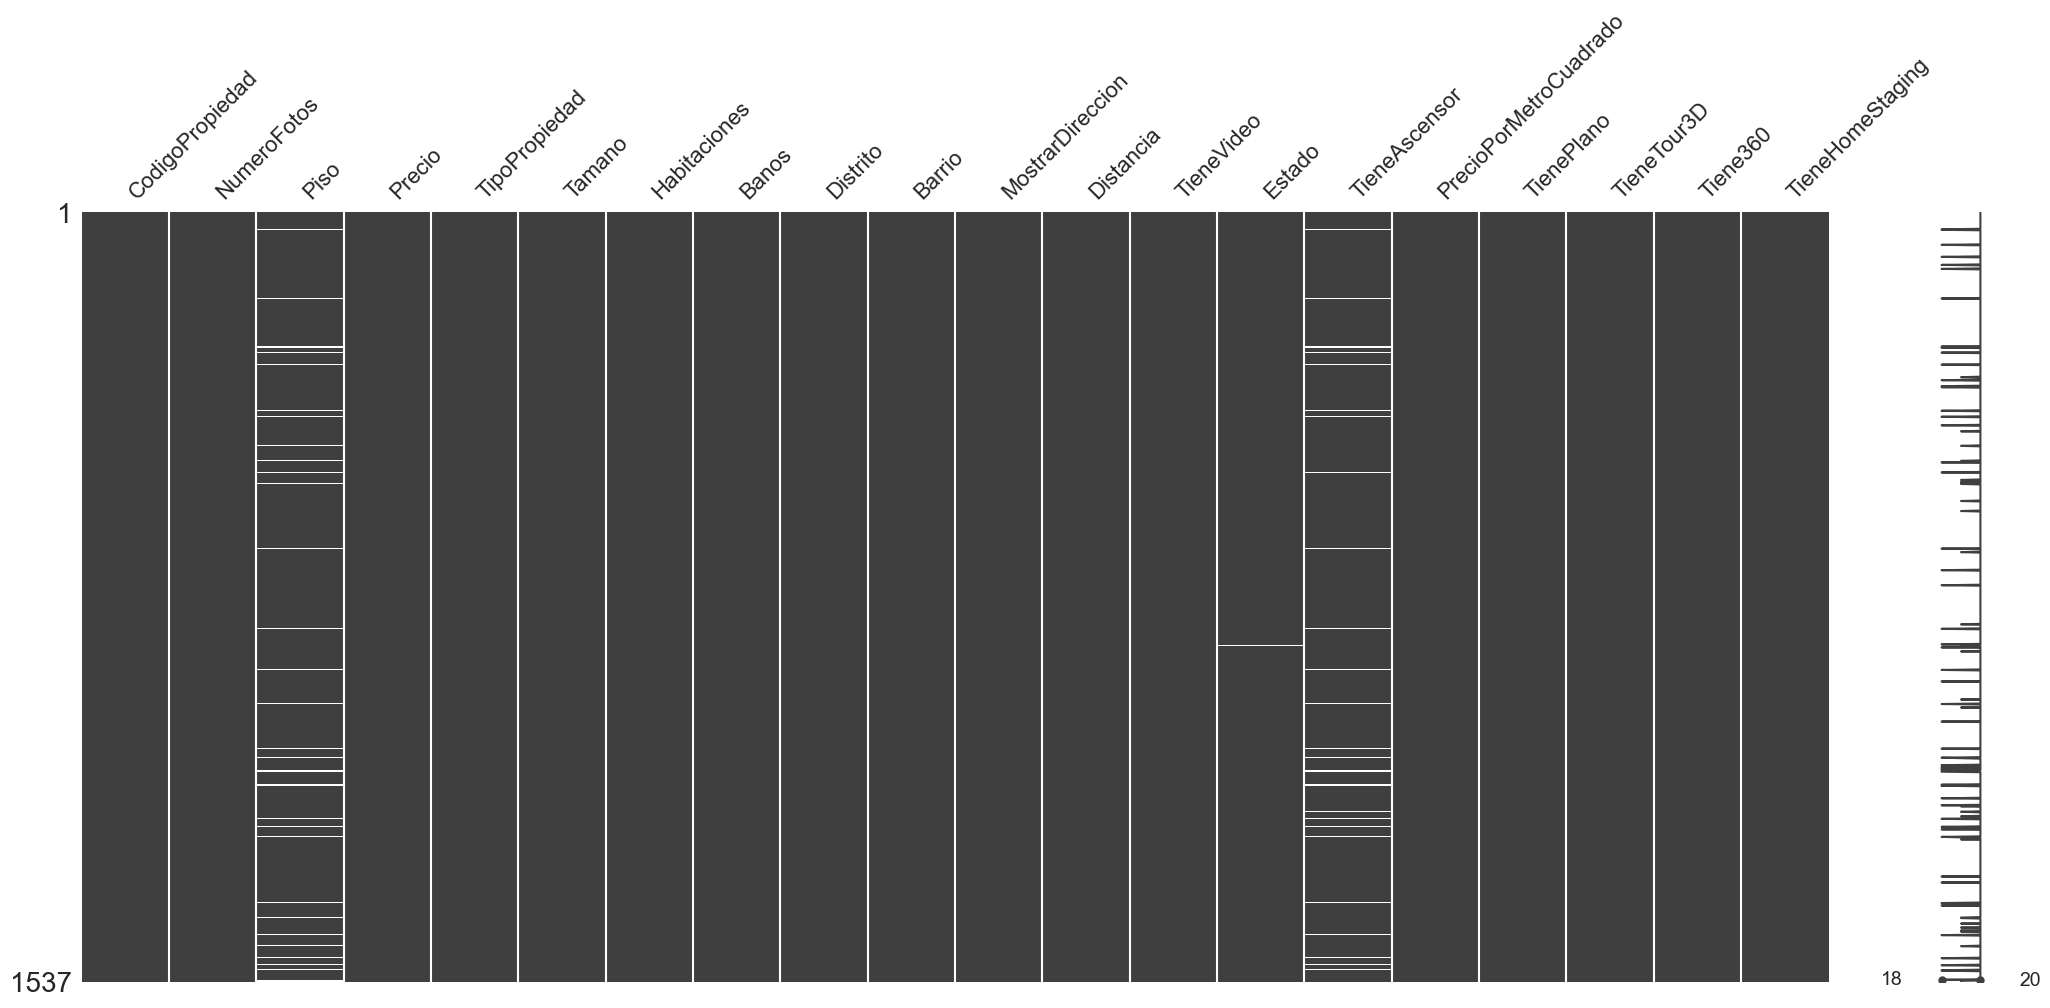

In [9]:
msno.matrix(df)

<Axes: >

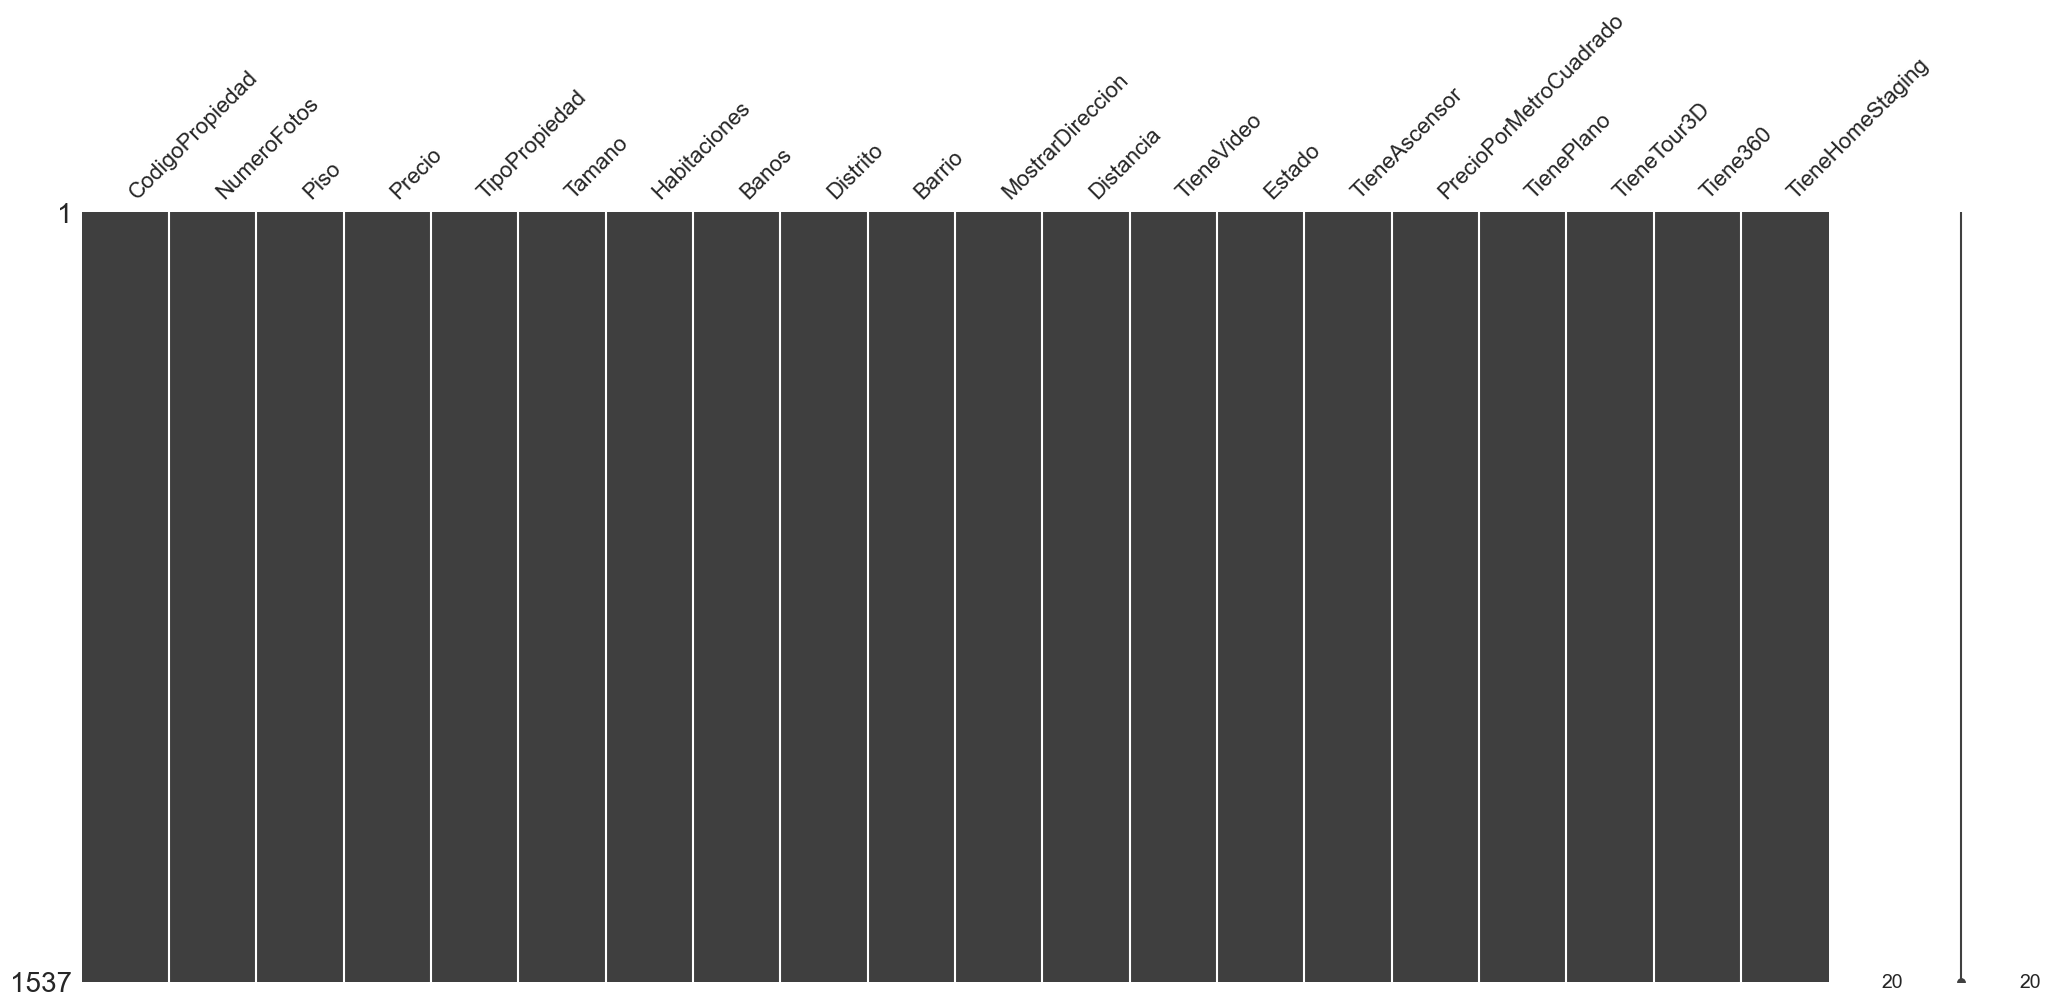

In [10]:
# tratamiendo de valores nulos

# floor
# al observar los datos en el dataset encontramos que los pisos sin datos corresponden a pisos en bajo y le daremos 
# el valor 0, asi tambien reemplazaremos los datos que corresponden a bj como 0

# exterior
# al observar los datos en el dataset encontramos que los datos faltantes corresponden a chalet o casas de campo
# por lo tanto lo cargaremos como TRUE en el dataset

# hasLift
# asumiremos que los pisos que no cuentan con valores en esta variable no cuentan con ascensor

# Rellenar valores nulos en las columnas
df['Piso'].fillna(0, inplace=True)
df['Estado'] = df['Estado'].fillna("good")
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

# Mostrar el DataFrame resultante para verificar los cambios
msno.matrix(df)

In [11]:
# Reemplazar valores específicos en la columna 'Piso'
df['Piso'].replace({'bj': 0, 'en': 0, 'ss': 0, 'st': 0}, inplace=True)

# Convertir la columna 'Piso' a tipo numérico
df['Piso'] = pd.to_numeric(df['Piso'], errors='coerce').fillna(0)

# Rellenar valores nulos en otras columnas
df['Piso'].fillna(0, inplace=True)
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

In [12]:
# al analizar las variables encontramos que los tipos estan mal especificados
df['Piso'] = df['Piso'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CodigoPropiedad         1537 non-null   int64  
 1   NumeroFotos             1537 non-null   int64  
 2   Piso                    1537 non-null   int32  
 3   Precio                  1537 non-null   float64
 4   TipoPropiedad           1537 non-null   object 
 5   Tamano                  1537 non-null   float64
 6   Habitaciones            1537 non-null   int64  
 7   Banos                   1537 non-null   int64  
 8   Distrito                1537 non-null   object 
 9   Barrio                  1537 non-null   object 
 10  MostrarDireccion        1537 non-null   bool   
 11  Distancia               1537 non-null   int64  
 12  TieneVideo              1537 non-null   bool   
 13  Estado                  1537 non-null   object 
 14  TieneAscensor           1537 non-null   

In [14]:
#A pesar que ya hemos revisado los nulls, restaría revisar cuántas filas de columnas tenemos completadas con valores que 
#NO sean cero. Esto nos sirve para detectar potenciales errores. Por ejemplo, no tendría sentido 100% de piscina en todos 
#los pisos.

# Calcula el porcentaje de valores distintos de cero en cada columna
porcentaje_no_ceros = df.apply(lambda col: (col != 0).mean() * 100)

# Muestra el resultado
print(porcentaje_no_ceros)

CodigoPropiedad           100.000000
NumeroFotos                99.349382
Piso                       87.638256
Precio                    100.000000
TipoPropiedad             100.000000
Tamano                    100.000000
Habitaciones               98.438517
Banos                      99.674691
Distrito                  100.000000
Barrio                    100.000000
MostrarDireccion           35.979180
Distancia                 100.000000
TieneVideo                 19.323357
Estado                    100.000000
TieneAscensor              78.399480
PrecioPorMetroCuadrado    100.000000
TienePlano                 48.275862
TieneTour3D                 3.318152
Tiene360                   14.183474
TieneHomeStaging            1.951854
dtype: float64


In [15]:
# Haremos el mismo trabajo con cada columna, investigando cual es la media, y cuál es el valor mínimo y máximo.

# Calcula el resumen estadístico
summary_stats = df.describe()

# Selecciona las métricas deseadas
metrics = ['max', 'min', 'mean', '50%']  # '50%' es la mediana

# Obtiene el resumen estadístico solo para las métricas seleccionadas
summary_metrics = summary_stats.loc[metrics]

# Transpone el resultado para que las métricas estén en las filas y las columnas representen las estadísticas
summary_metrics = summary_metrics.T

# Renombra las columnas para mayor claridad
summary_metrics.columns = ['Valor Máximo', 'Valor Mínimo', 'Promedio', 'Mediana']

# Muestra el resultado
print(summary_metrics)

                        Valor Máximo  Valor Mínimo      Promedio      Mediana
CodigoPropiedad          105916048.0    36718278.0  1.037027e+08  104991161.0
NumeroFotos                     99.0           0.0  2.534223e+01         23.0
Piso                            19.0          -1.0  3.150943e+00          3.0
Precio                     1280000.0       29900.0  2.341913e+05     195000.0
Tamano                         572.0          33.0  1.073215e+02         91.0
Habitaciones                    12.0           0.0  2.993494e+00          3.0
Banos                           11.0           0.0  1.595966e+00          1.0
Distancia                     2997.0          34.0  1.593144e+03       1634.0
PrecioPorMetroCuadrado        5865.0         383.0  2.180441e+03       2058.0


In [16]:
df.sort_values(by='Habitaciones', ascending=False)[['CodigoPropiedad', 'Habitaciones']].head(10)


,CodigoPropiedad,Habitaciones
1016,105262381,12
1413,105554862,11
191,98801344,11
1475,101987929,10
835,104311208,9
519,95713400,9
740,102006975,9
1181,104286632,8
508,102794058,8
620,104543694,8


In [17]:
df.sort_values(by='Banos', ascending=False)[['CodigoPropiedad', 'Banos']].head(10)

,CodigoPropiedad,Banos
1413,105554862,11
1475,101987929,10
358,105639491,8
125,104952675,7
831,100847387,7
912,105687719,7
1448,103694500,7
714,103236350,6
270,103672682,6
1175,104620360,5


In [18]:
# A fin de facilitar el trabajo que haremos en el siguiente EDA, catalogaremos 
# las variables en continuas, discretas y separaremos los distritos.


# Definir las características discretas, continuas y distritos en español
features_discretas = [
    'TipoPropiedad', 'Exterior', 'MostrarDireccion', 'TieneVideo', 'Estado',
    'NuevaConstruccion', 'TieneAscensor', 'TienePlano', 'TieneTour3D',
    'Tiene360', 'TieneHomeStaging', 'DestacadoNuevoDesarrollo', 'EspacioEstacionamiento'
]

features_continuas = [
    'NumeroFotos', 'Piso', 'Precio', 'Tamano', 'Habitaciones', 'Banos',
    'Distancia', 'PrecioPorMetroCuadrado'
]

distritos = list(df['Distrito'].unique())  # Asumiendo que 'df' es el nombre de tu DataFrame
label = ['Precio']

In [19]:
#!pip install graphing

In [20]:
#!pip install statsmodels

In [21]:
# Descargar el archivo graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py -O graphing.py

# Importar el módulo graphing
import graphing

# Importar las demás librerías
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [22]:
# Agrupar por distrito y contar el número de localizaciones únicas en cada distrito
localizaciones_por_distrito = df.groupby('Distrito')['Barrio'].nunique().reset_index()

# Mostrar el resultado
print(localizaciones_por_distrito)

                                Distrito  Barrio
0                                  Actur       3
1                               Almozara       1
2                 Arrabal - Barrio Jesus       2
3      Avda Cataluña-Santa Isabel-Movera       1
4                        Casco Historico       4
5                                 Centro       4
6                               Delicias       6
7                                La Jota       1
8                            Las Fuentes       1
9                    Miraflores San Jose       4
10              Pol Universidad Romareda       1
11                            Ruiseñores       1
12  Salvador Allende-Parque Goya-Zorongo       1
13                      Torrero - La Paz       3
14             Universidad San Francisco       1


In [23]:
# Hacer conteos solo por distrito
distritos_grouped = (df
    .groupby(["Distrito"], as_index=False)
    .agg(conteo_props=("CodigoPropiedad", "count"))
    ).sort_values("conteo_props", ascending=False)

# Calcular el total de propiedades
total_props = df.shape[0]

# Calcular el porcentaje total
distritos_grouped['porcentaje_total'] = round(100 * distritos_grouped['conteo_props'] / total_props, 1)

# Mostrar el resultado
print(distritos_grouped)

                                Distrito  conteo_props  porcentaje_total
4                        Casco Historico           322              20.9
6                               Delicias           286              18.6
5                                 Centro           270              17.6
9                    Miraflores San Jose           165              10.7
1                               Almozara            91               5.9
8                            Las Fuentes            78               5.1
11                            Ruiseñores            58               3.8
0                                  Actur            53               3.4
2                 Arrabal - Barrio Jesus            51               3.3
14             Universidad San Francisco            46               3.0
13                      Torrero - La Paz            44               2.9
12  Salvador Allende-Parque Goya-Zorongo            41               2.7
7                                La Jota           

In [24]:
#!pip install nbformat


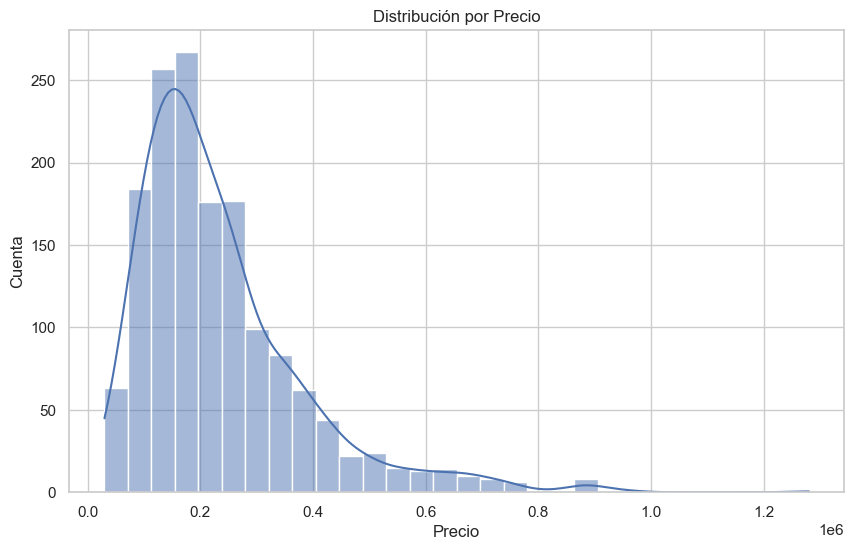

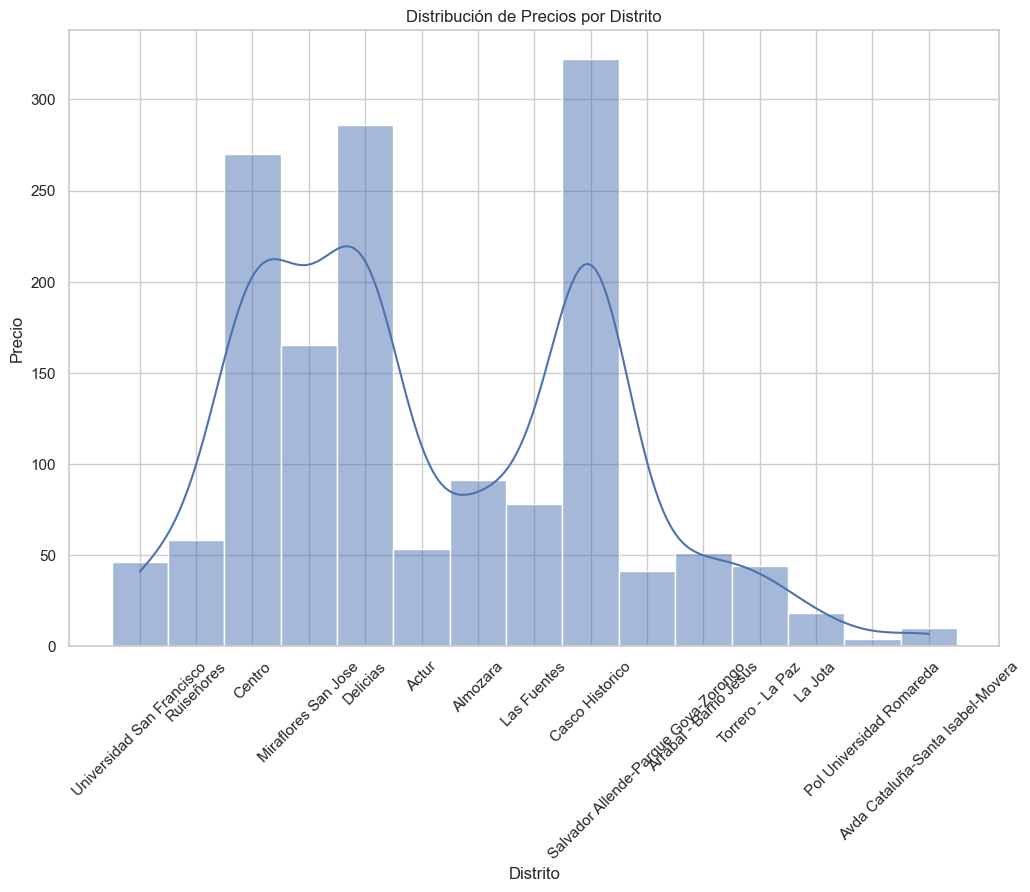

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Visualizar la distribución general del precio
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], bins=30, kde=True)
plt.title('Distribución por Precio')
plt.xlabel('Precio')
plt.ylabel('Cuenta')
plt.show()

# Visualizar la distribución del precio por distrito
plt.figure(figsize=(12, 8))
sns.histplot(df['Distrito'], bins=30, kde=True)
plt.title('Distribución de Precios por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()


In [26]:
import pandas as pd

# Supongamos que df es tu DataFrame y ya está cargado con los datos proporcionados

# Calcula Q1 y Q3
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)

# Calcula el IQR
IQR = Q3 - Q1

# Calcula los límites para identificar valores atípicos
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Filtra los valores atípicos
outliers = df[(df['Precio'] < lower_fence) | (df['Precio'] > upper_fence)]

# Cuenta la cantidad de valores atípicos
cantidad_outliers = len(outliers)

# Muestra la cantidad de valores atípicos
print(f'Cantidad de valores atípicos: {cantidad_outliers}')

# Opcional: Mostrar los valores atípicos
print(outliers)

Cantidad de valores atípicos: 80
      CodigoPropiedad  NumeroFotos  Piso    Precio TipoPropiedad  Tamano  \
9            88869622           80     2  668000.0          flat   260.0   
64          104067268           67     3  665000.0        duplex   246.0   
65          100585057           52     0  680000.0        chalet   249.0   
89           97820761           67     0  690000.0        chalet   239.0   
92          104999937            3     6  730000.0          flat   232.0   
...               ...          ...   ...       ...           ...     ...   
1405         97580573           14     5  599900.0          flat   243.0   
1408        104573564            6     0  748000.0          flat   321.0   
1448        103694500            7     1  698900.0          flat   200.0   
1500        102291100           13     8  748000.0          flat   321.0   
1528        105731560            0     8  598500.0          flat   321.0   

      Habitaciones  Banos         Distrito            

In [27]:
# A fin de que nos afecten menos los valores atípicos a nuestra distribución, 
# cogeremos como 350 € el tope minimo de valor de las propiedades, 
# quitando aquellas que lo superen. A continuación volveremos a ver cómo queda la distribución.

# Filtra el DataFrame para eliminar las filas donde el precio es mayor a 1,500,000
df = df[df['Precio'] <= 598500.0]

# Muestra la cantidad de filas restantes en el DataFrame
cantidad_filas = len(df)
print(f'Cantidad de filas restantes: {cantidad_filas}')

Cantidad de filas restantes: 1483


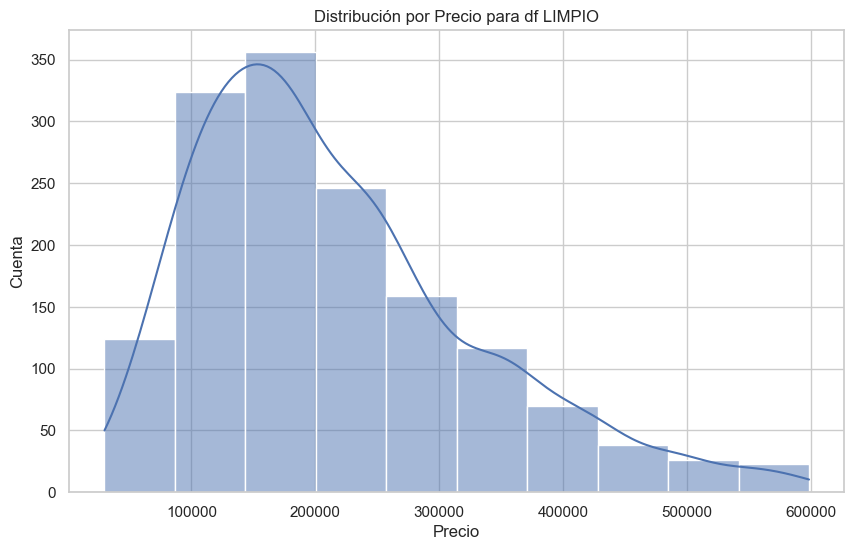

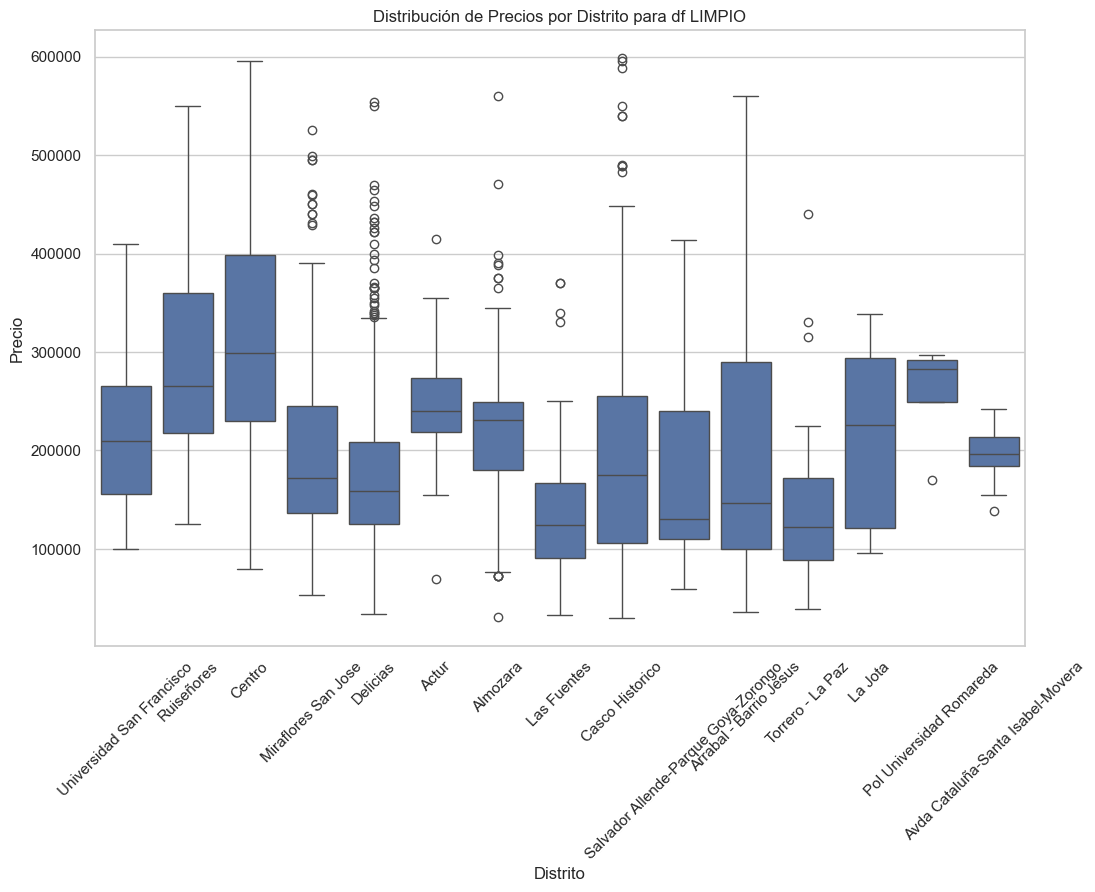

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Visualizar la distribución general del precio en el DataFrame limpio
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], bins=10, kde=True)
plt.title('Distribución por Precio para df LIMPIO')
plt.xlabel('Precio')
plt.ylabel('Cuenta')
plt.show()

# Visualizar la distribución del precio por distrito en el DataFrame limpio
plt.figure(figsize=(12, 8))
sns.boxplot(x='Distrito', y='Precio', data=df)
plt.title('Distribución de Precios por Distrito para df LIMPIO')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

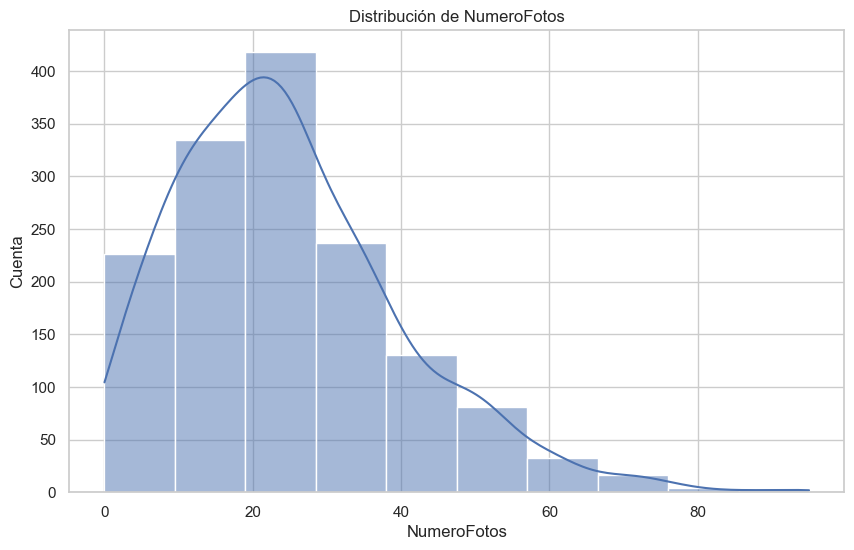

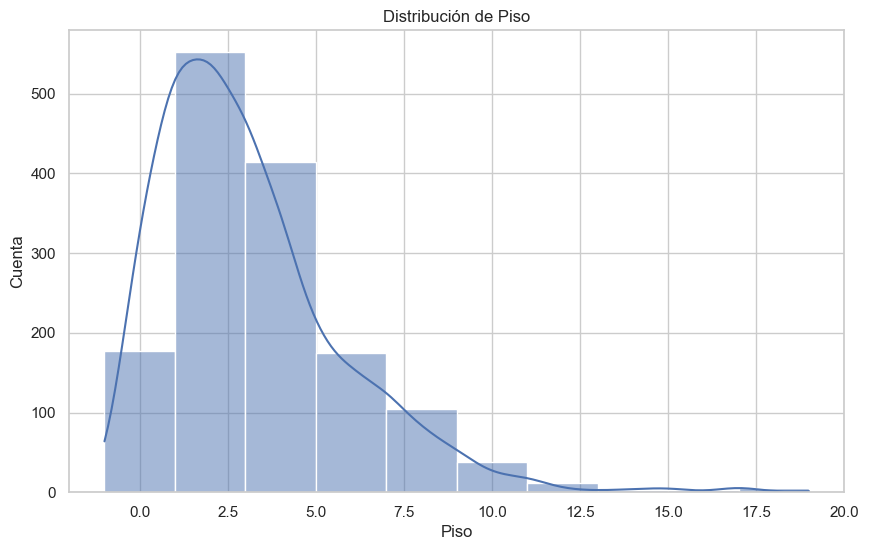

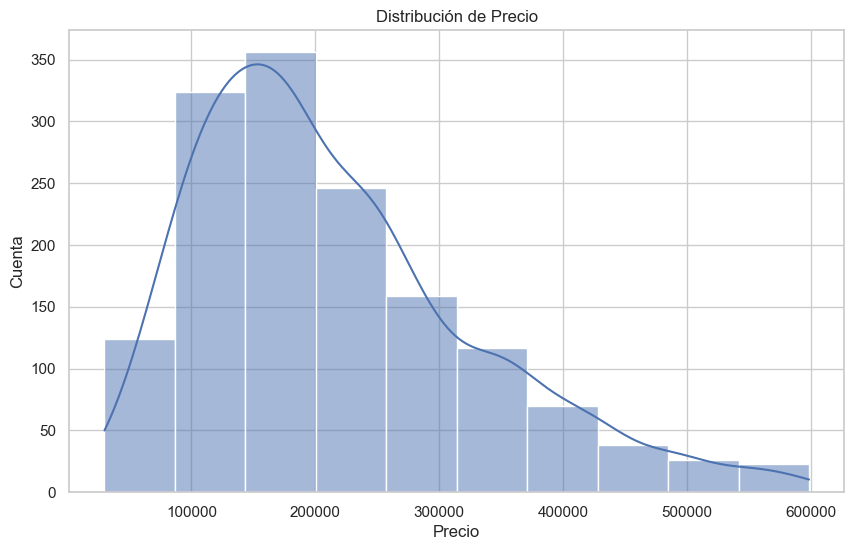

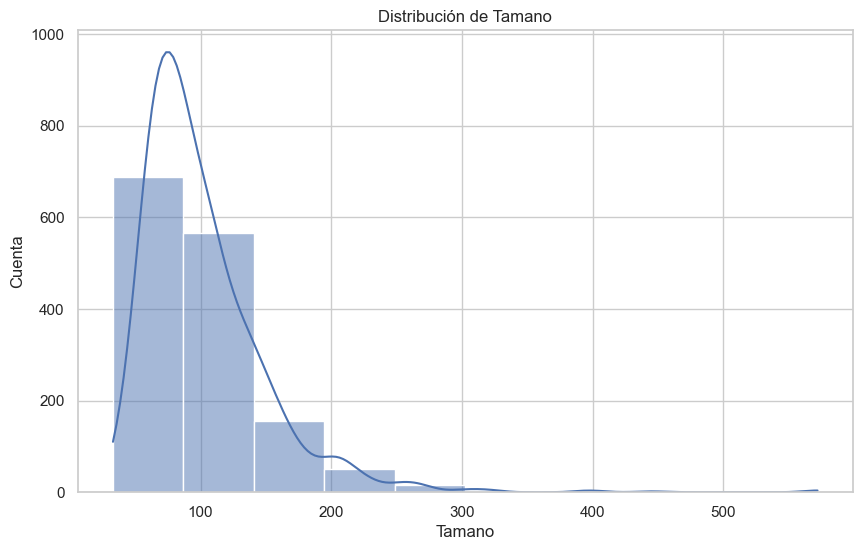

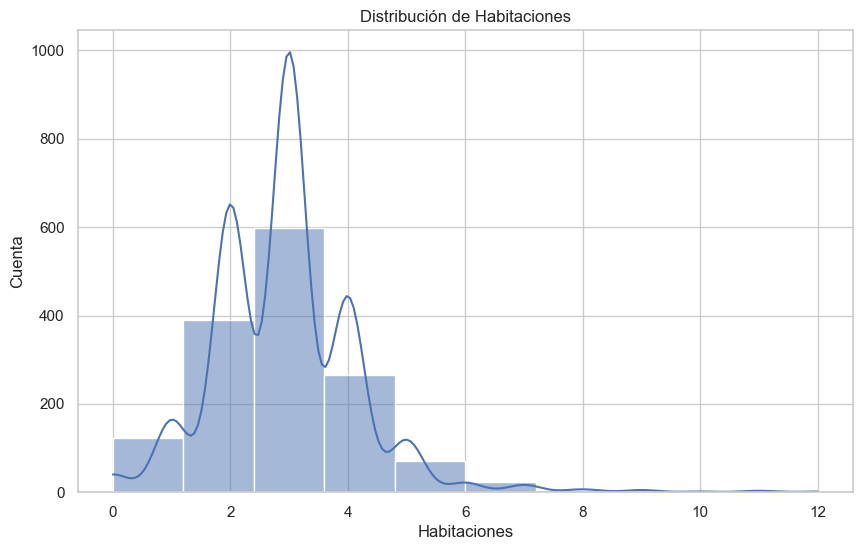

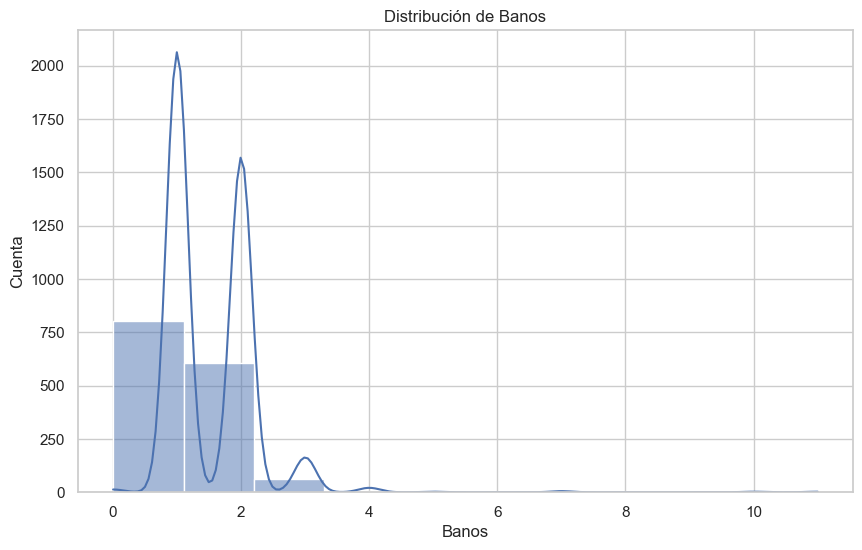

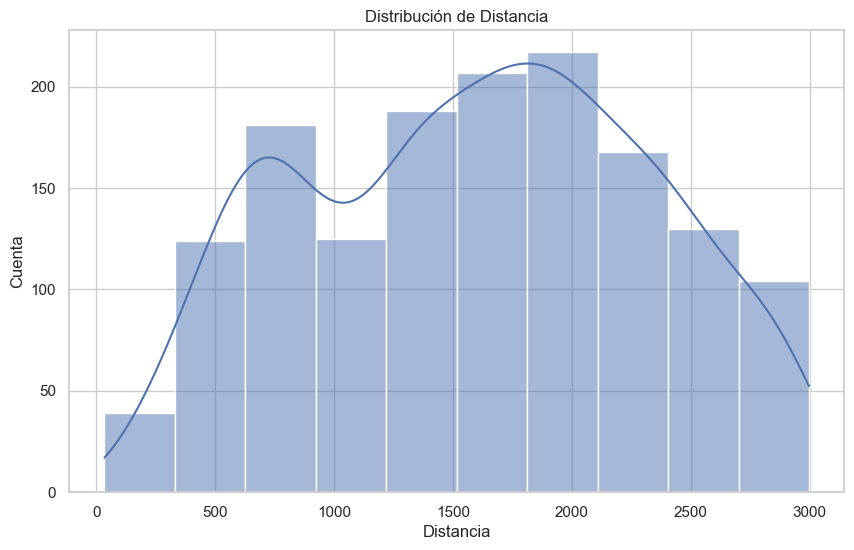

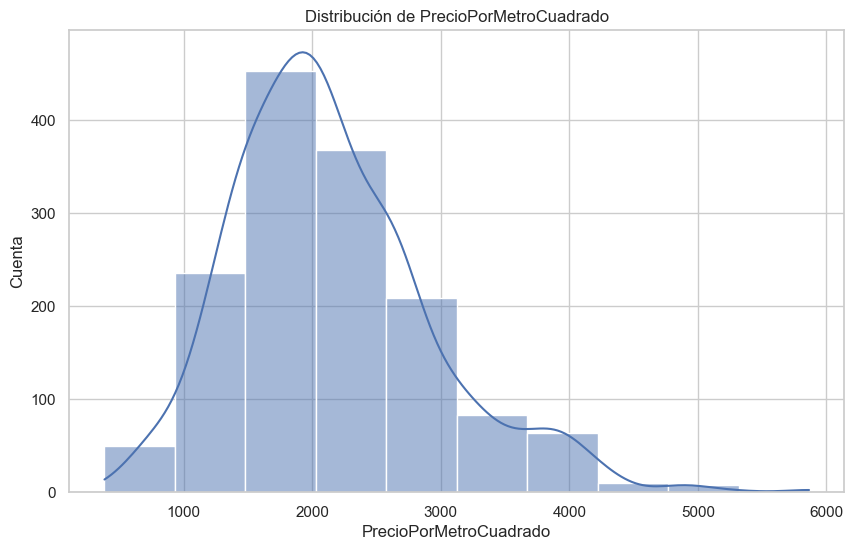

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que features_continuas ya está definida
features_continuas = ['NumeroFotos', 'Piso', 'Precio', 'Tamano', 'Habitaciones', 'Banos', 'Distancia', 'PrecioPorMetroCuadrado']

# Generar histogramas para cada característica continua
for col in features_continuas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cuenta')
    plt.show()


In [30]:
# Para una mejor practica realizaremos un cambio de las variables objet y bool a numericas
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
df_transformed = df.copy()

# Convertir columnas booleanas a enteros (True -> 1, False -> 0)
bool_columns = df_transformed.select_dtypes(include=['bool']).columns
df_transformed[bool_columns] = df_transformed[bool_columns].astype(int)

# Convertir columnas de tipo object a números enteros usando LabelEncoder
object_columns = df_transformed.select_dtypes(include=['object']).columns

# Inicializar LabelEncoder
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col].astype(str))
    label_encoders[col] = le

# Mostrar el DataFrame transformado
print(df_transformed.head())

# Opcional: Guardar el DataFrame transformado a un nuevo archivo CSV
# df_transformed.to_csv('df_transformed.csv', index=False)

   CodigoPropiedad  NumeroFotos  Piso    Precio  TipoPropiedad  Tamano  \
0        105157805           67     7  250000.0              2   113.0   
1        105832061           35     3  195000.0              2    65.0   
2        105447275           50     0  220000.0              2   148.0   
3        104623253           46     2  236000.0              2   156.0   
4        105341044           31     0  160000.0              2    66.0   

   Habitaciones  Banos  Distrito  Barrio  MostrarDireccion  Distancia  \
0             4      2        14      33                 0       2517   
1             2      1        14      33                 0       1858   
2             4      2        14      33                 0       1833   
3             5      3        11      28                 0       2393   
4             2      1        11      28                 0       2100   

   TieneVideo  Estado  TieneAscensor  PrecioPorMetroCuadrado  TienePlano  \
0           1       0              1    

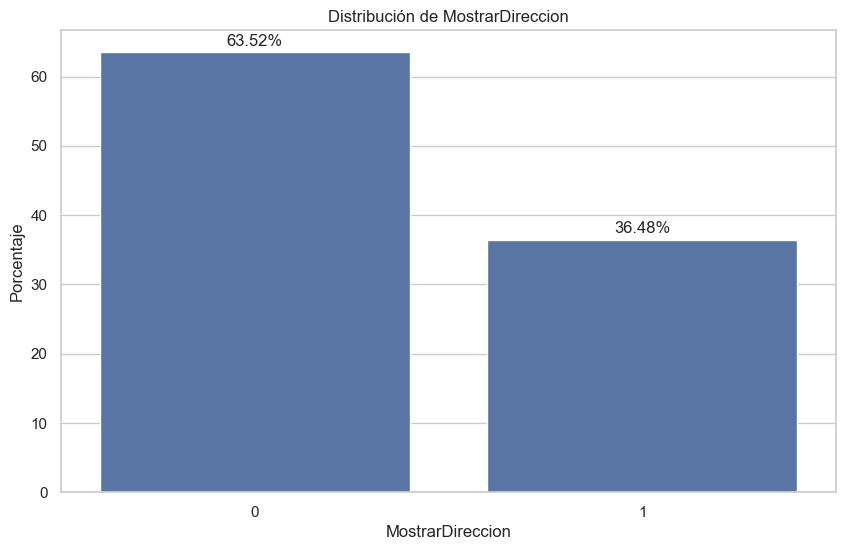

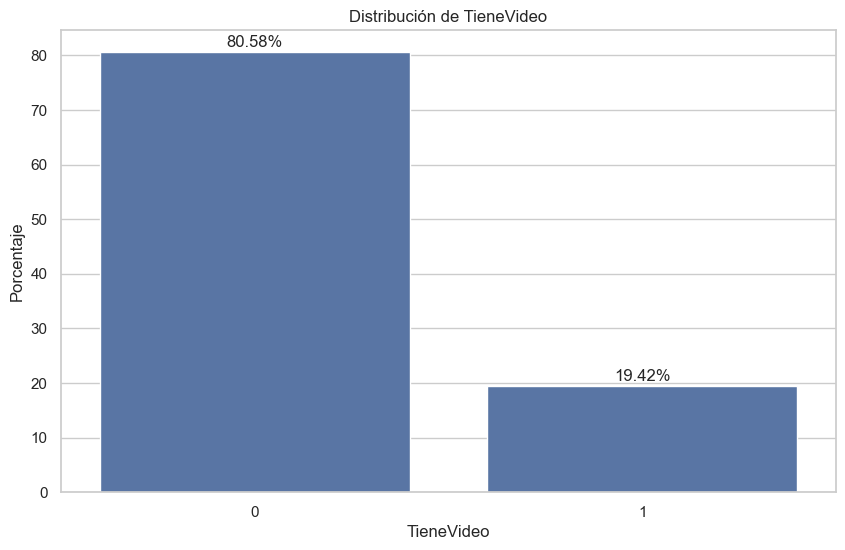

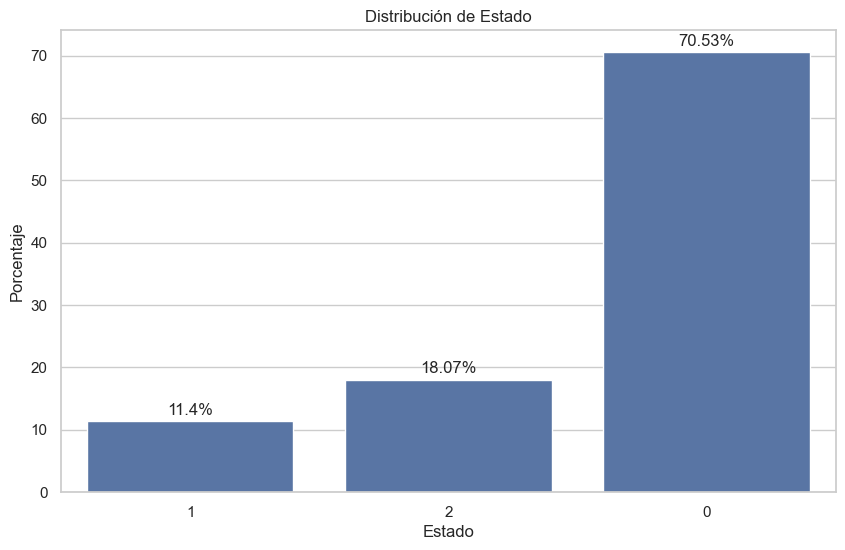

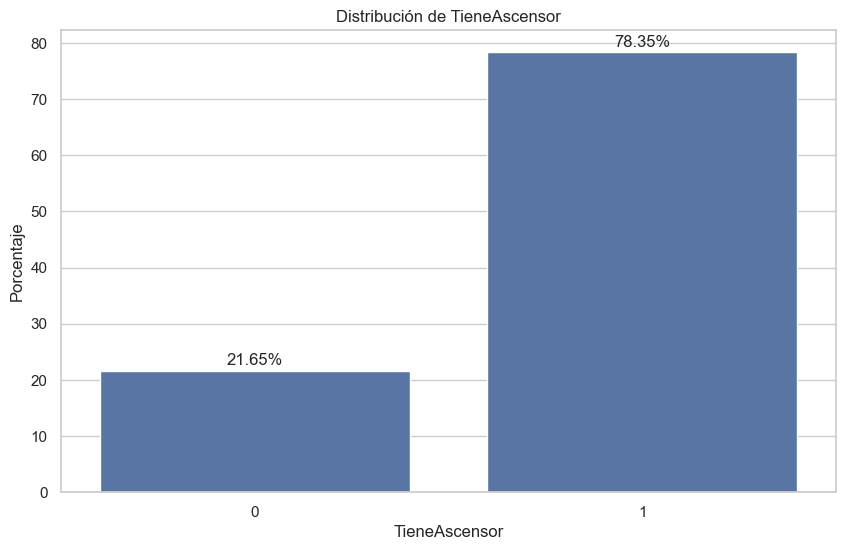

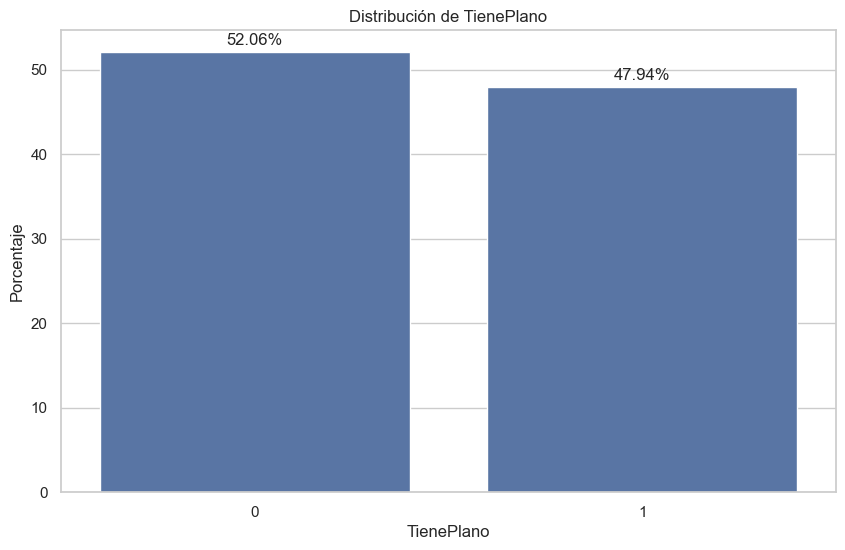

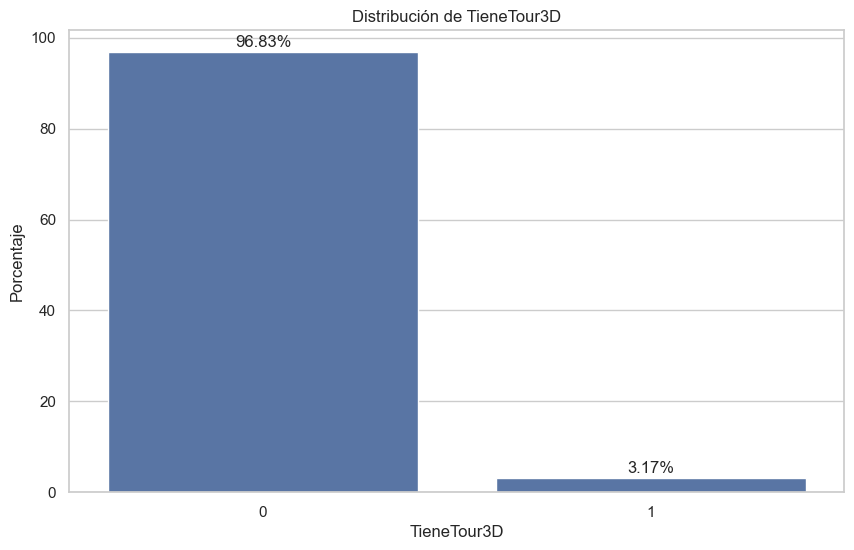

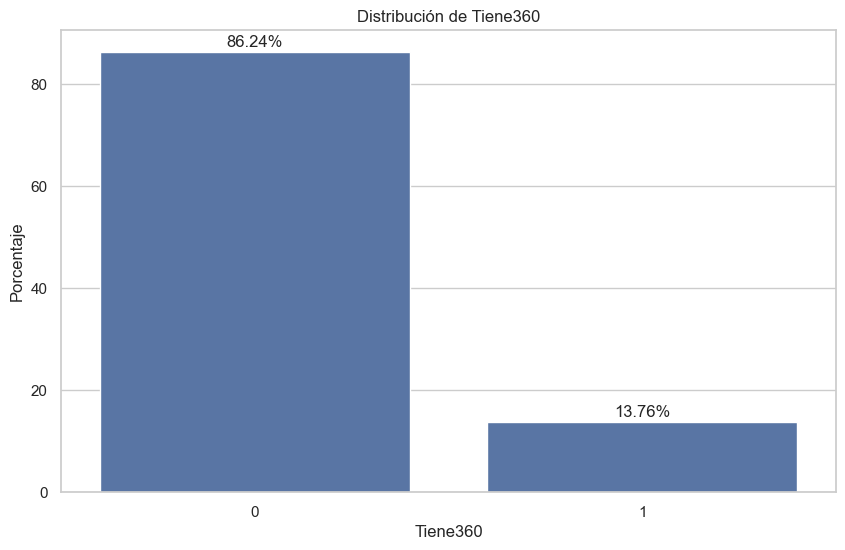

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que features_discretas ya está definida
features_discretas = ['MostrarDireccion', 'TieneVideo', 'Estado', 'TieneAscensor', 'TienePlano', 'TieneTour3D', 'Tiene360']

# Generar histogramas para cada característica discreta
for col in features_discretas:
    # Contar las frecuencias relativas
    counts = df_transformed[col].value_counts(normalize=True)
    # Crear etiquetas con porcentajes
    labels = [f'{round(counts[c] * 100, 2)}%' for c in counts.index]

    # Crear la figura y el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index.astype(str), y=counts.values * 100)
    
    # Añadir los porcentajes como etiquetas
    for i, v in enumerate(counts.values * 100):
        plt.text(i, v + 0.5, labels[i], ha='center', va='bottom')

    # Invertir las etiquetas para algunas columnas específicas
    if col in ['TieneAscensor', 'Exterior', 'Estado']:
        plt.gca().invert_xaxis()

    # Configurar título y etiquetas
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje')
    
    # Mostrar el gráfico
    plt.show()


In [32]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1483 entries, 0 to 1536
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CodigoPropiedad         1483 non-null   int64  
 1   NumeroFotos             1483 non-null   int64  
 2   Piso                    1483 non-null   int32  
 3   Precio                  1483 non-null   float64
 4   TipoPropiedad           1483 non-null   int32  
 5   Tamano                  1483 non-null   float64
 6   Habitaciones            1483 non-null   int64  
 7   Banos                   1483 non-null   int64  
 8   Distrito                1483 non-null   int32  
 9   Barrio                  1483 non-null   int32  
 10  MostrarDireccion        1483 non-null   int32  
 11  Distancia               1483 non-null   int64  
 12  TieneVideo              1483 non-null   int32  
 13  Estado                  1483 non-null   int32  
 14  TieneAscensor           1483 non-null   int32

Correlaciones significativas:
               Variable 1    Variable 2  Correlation
0                  Tamano        Precio     0.715127
2                   Banos        Precio     0.651531
1            Habitaciones        Tamano     0.628712
3                   Banos        Tamano     0.625536
5  PrecioPorMetroCuadrado        Precio     0.561161
4                   Banos  Habitaciones     0.511469


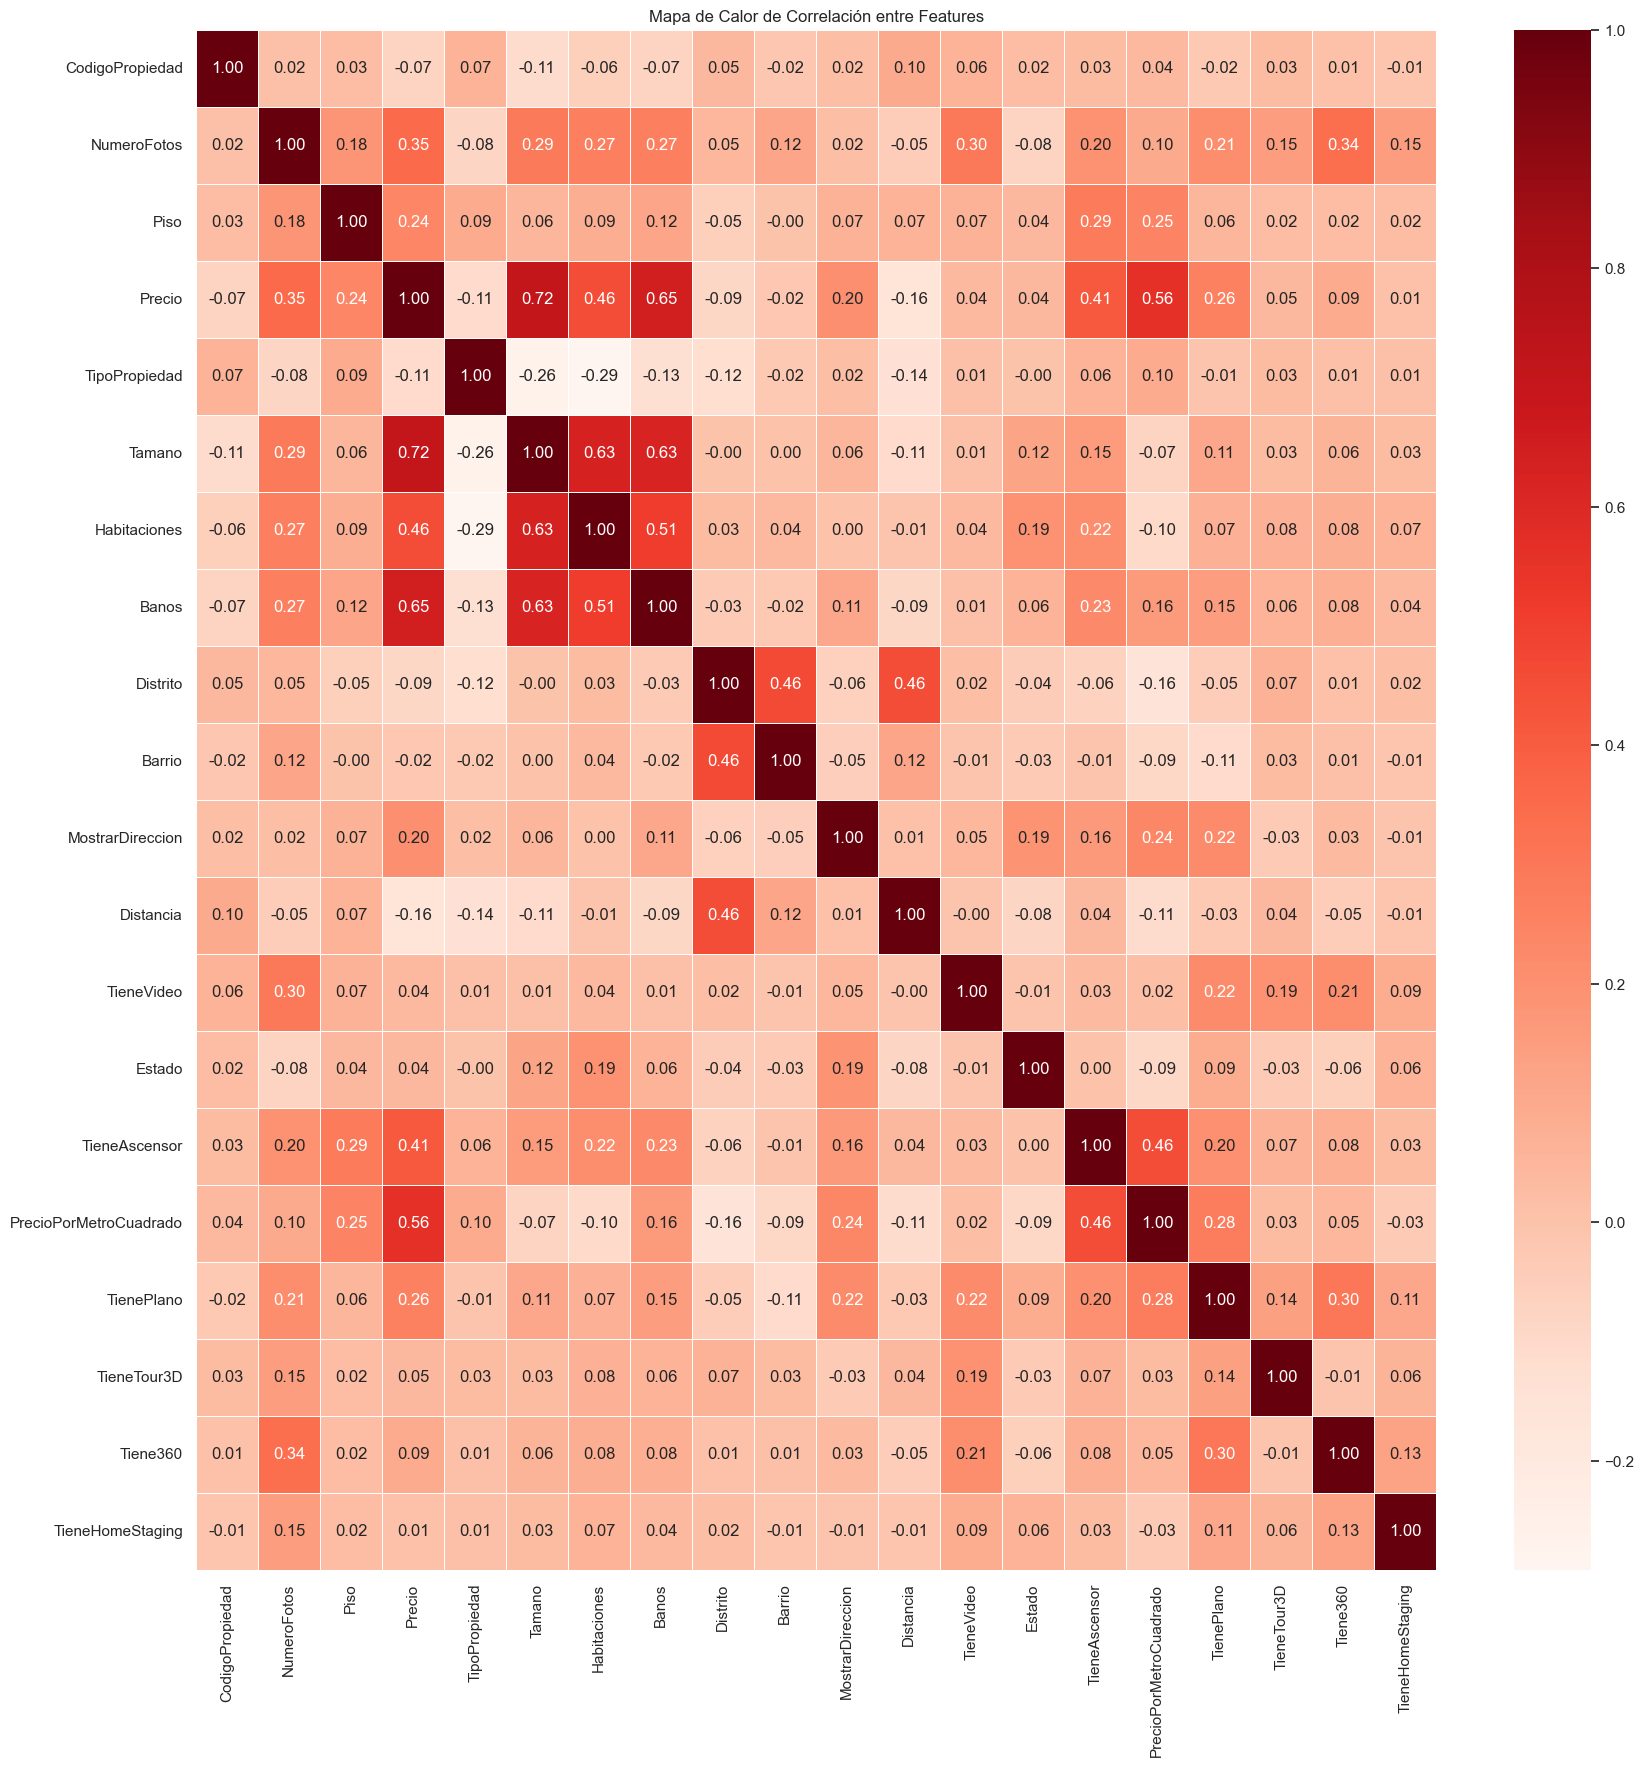

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
cor = df_transformed.corr()

# Crear una lista para almacenar las correlaciones significativas
correlation_list = []

# Umbral de correlación
threshold_1 = 0.5
threshold_2 = -0.5


# Iterar sobre la matriz de correlación para encontrar correlaciones significativas
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold_1:
            correlation_list.append({
                'Variable 1': cor.columns[i],
                'Variable 2': cor.columns[j],
                'Correlation': cor.iloc[i, j]
            })

# Iterar sobre la matriz de correlación para encontrar correlaciones significativas
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) < threshold_2:
            correlation_list.append({
                'Variable 1': cor.columns[i],
                'Variable 2': cor.columns[j],
                'Correlation': cor.iloc[i, j]
            })

# Convertir la lista en un DataFrame
significant_correlations = pd.DataFrame(correlation_list)

# Mostrar las correlaciones significativas
print("Correlaciones significativas:")
print(significant_correlations.sort_values(by='Correlation', ascending=False))

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Calcular la matriz de correlación
cor = df_transformed.corr()

# Crear el mapa de calor
sns.heatmap(cor, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlación entre Features')
plt.show()

# Opcional: Guardar las correlaciones significativas en un archivo CSV
# significant_correlations.to_csv('significant_correlations.csv', index=False)
